<a href="https://colab.research.google.com/github/ShaunZhxiong/Spring2022-Week8/blob/master/DL_Basics1_SimpleMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Simple multi-layer perceptron**


In [1]:
from __future__ import print_function

# inlcude tensorflow but more friendly to new users
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
import numpy as np

**Set vars, load MNIST (hand written digits) data**

In [2]:
batch_size = 20000
# ten digits
num_classes = 10

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
np.sum(y_train==8)

5851

**Visualize data**

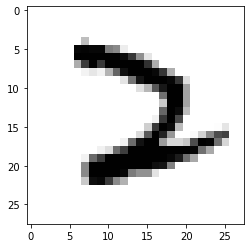

2


In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[3890],cmap=plt.cm.binary)
plt.show()
#x_train[0].shape

print(y_train[3890])

In [6]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# can also use scikit.learn.standarscalor
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train[0:20]

60000 train samples
10000 test samples


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [7]:
y_train.shape

(60000,)

In [8]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

y_train.shape

(60000, 10)

In [9]:
y_train[0:20,:]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

**Model description**

- Put the "lego blocks" together


In [15]:
# know more about the activation: https://medium.com/dataseries/basic-overview-of-convolutional-neural-network-cnn-4fcc7dbb4f17
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
#
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
#
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


**Visualization of the model**

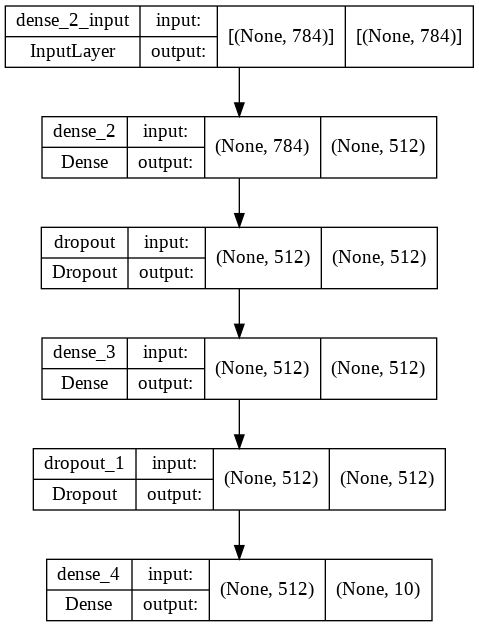

In [16]:
from keras.utils.vis_utils import plot_model

#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
plot_model(model, show_shapes=True, show_layer_names=True)

**Compile the model**

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

**Fit the model**

In [18]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=50,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/50
3/3 [==============================] - 1s 141ms/step - loss: 1.8962 - accuracy: 0.3689 - val_loss: 1.1991 - val_accuracy: 0.5822
Epoch 2/50
3/3 [==============================] - 0s 73ms/step - loss: 1.1018 - accuracy: 0.6434 - val_loss: 0.7797 - val_accuracy: 0.7606
Epoch 3/50
3/3 [==============================] - 0s 62ms/step - loss: 0.7975 - accuracy: 0.7549 - val_loss: 0.5943 - val_accuracy: 0.8288
Epoch 4/50
3/3 [==============================] - 0s 57ms/step - loss: 0.5759 - accuracy: 0.8309 - val_loss: 0.4916 - val_accuracy: 0.8438
Epoch 5/50
3/3 [==============================] - 0s 56ms/step - loss: 0.5290 - accuracy: 0.8299 - val_loss: 0.5153 - val_accuracy: 0.8267
Epoch 6/50
3/3 [==============================] - 0s 56ms/step - loss: 0.5403 - accuracy: 0.8223 - val_loss: 0.3660 - val_accuracy: 0.8920
Epoch 7/50
3/3 [==============================] - 0s 54ms/step - loss: 0.3755 - accuracy: 0.8906 - val_loss: 0.3064 - val_accuracy: 0.9137
Epoch 8/50
3/3 [==========

**Evaluate the model**

In [19]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09852203726768494
Test accuracy: 0.968999981880188
